In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error
import io
import xgboost as xgb
from xgboost import XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import pandas as pd
import xgboost as xgb
import pickle


custom_style_gold = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#FFFFF0',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#E6DAA6',
}

custom_style_Lavender = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#E6E6FA',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#C79FEF',
}

plt.style.use(custom_style_gold)


In [2]:
#This data is given by Tatiana, and has not been processed by Lcfit: its light curves features calculated with FT.

data_Ta = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/XGB/data/rrls_crestani_new.csv')
data_Ta.rename(columns ={'pf': 'period','FeH_err': 'FeH_e', 'A1_error': 'A1_e', 'A2_error': 'A2_e', 'A1_error' : 'A3_e',
                       'phi31_g': 'phi31', 'phi21_g': 'phi21', 'source_id': 'id' }, inplace = True)

T = data_Ta[['id', 'period', 'FeH', 'FeH_e', 'A1', 'A2', 'A3', 'phi31', 'phi21']]

# the input/output dataframe
X_L_df = L[['period', 'A1', 'A2', 'A3', 'phi31', 'phi21']]
y_L_df = L[['FeH']]

# the input/output array
X_T = np.array(T[['period', 'A1', 'A2', 'A3', 'phi31', 'phi21']])
y_T = np.array(T[['FeH']])
T.head(5)

id    period   FeH  FeH_e        A1        A2        A3  \
0  6380659528686603008  0.550068 -1.86   0.01  0.314049  0.141196  0.111784   
1  5412243359495900928  0.573513 -1.84   0.09  0.279495  0.130409  0.077891   
2  4055098870077726976  0.427283 -1.30   0.11  0.310970  0.139440  0.110775   
3  6735230515154698880  0.367562 -0.17   0.04  0.367564  0.181866  0.072992   
4  2973954279102006656  0.656178 -1.66   0.11  0.268524  0.128664  0.083861   

      phi31     phi21  
0  1.668996  3.863215  
1  2.312533  4.092844  
2  1.555001  3.565112  
3  1.981498  3.935978  
4  2.240326  4.163688

In [177]:
# This is the same data, but the features are calculated by the Lcfit package:

data_Lc = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/XGB/data/meta_train.csv')

L = data_Lc[['id', 'period', 'FeH', 'FeH_e', 'A1', 'A2', 'A3', 'phi31', 'phi21']]

# the input/output dataframe
X_L_df = L[['period', 'A1', 'A2', 'A3', 'phi31', 'phi21']]
y_L_df = L[['FeH']]

# the input/output array
X_L =np.array( L[['period', 'A1', 'A2', 'A3', 'phi31', 'phi21']])
y_L = np.array(L[['FeH']])



L.head(5)

id    period   FeH  FeH_e     A1     A2     A3  phi31  \
0  6380659528686603008  0.550067 -1.86   0.01  0.319  0.152  0.124  4.956   
1  5412243359495900928  0.573507 -1.84   0.09  0.278  0.130  0.080  5.351   
2  4055098870077726976  0.427283 -1.30   0.11  0.401  0.188  0.052  6.489   
3  6735230515154698880  0.367551 -0.17   0.04  0.344  0.208  0.110  4.919   
4  2973954279102006656  0.656177 -1.66   0.11  0.259  0.131  0.077  5.477   

    phi21  
0  8.6052  
1  8.7582  
2  9.1971  
3  8.6583  
4  8.9018

In [4]:
# This is a dataset I found in Dekany's model, he trained his model on this dataset.

file = '/Users/melikakeshavarz/Desktop/Thesis/XGB/data/o4rrab_gaiaDR2_bp_rp_i_g_param.dat'



data = []
header = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
            header.append(out_line)
        else:
            line = line.split()
            data.append(line)
        

df = pd.DataFrame()

df = pd.DataFrame([[x for x in row] for row in data])
df[0] = df[0].astype(int)
header[0].split()
head_dict = {key: value for key, value in zip(header[0].split(), df.columns) }
df.columns = head_dict
df.drop_duplicates(inplace= True)
df.reset_index(drop = True)


#these are for training the models:
#x = df[['period', 'A1_g', 'A2_g', 'A3_g', 'phi31_g', 'phi21_g']]
x = df[['period', 'A1_g', 'A2_g', 'A3_g', 'phi31_g', 'phi21_g']]
y = df[['FeH']]

In [155]:
x.head(5)

period   A1_g   A2_g   A3_g phi31_g phi21_g
0  0.461818  0.328  0.138  0.086  5.5969  2.9037
1  0.545176  0.214  0.052  0.039  4.9804  2.0411
2  0.585123  0.251  0.131  0.082  5.6895  2.6895
3  0.461979  0.407  0.166  0.109   4.761  2.4251
4  0.711276  0.162  0.066  0.046  5.4342  2.5615

In [158]:
y[0:5]

FeH
0  -1.7214431110944624
1   -2.886219502782918
2  -1.4348027872030018
3  -1.4255067103771193
4  -2.5989645233109053

In [5]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV




params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 10,                   # Maximum depth of the tree
    'learning_rate': 0.01,             # Step size shrinkage 
    'subsample':  0.8,                # Fraction of samples used for training
    'colsample_bytree': 0.8,         # Fraction of features used for building trees
    'seed': 42                        # Random seed for reproducibility
}





kf = KFold(n_splits=100, shuffle=True, random_state=42)


mse_scores = []


for train_index, test_index in kf.split(x):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtrain = xgb.DMatrix(np.array(X_train), label=np.array(y_train))
    dtest = xgb.DMatrix(np.array(X_test), label=np.array(y_test))


    model = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=10,
                      evals=[(dtest, 'eval')], verbose_eval=False)


    y_pred = model.predict(dtest)


    fold_mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(fold_mse)


mean_cv_mse = np.mean(mse_scores)
print("Mean Cross-Validation Mean Squared Error:", mean_cv_mse)
num = mse_scores.index(np.min(mse_scores))
print(num)
    
    

Mean Cross-Validation Mean Squared Error: 0.12375448246605708
55


In [ ]:
l = []
for i, j in kf.split(x):
    l.append([i, j])
optimal = l[num]

train_index, valid_index = optimal 

X_train, X_valid = x.iloc[train_index], x.iloc[valid_index]
y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

In [386]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle = True, random_state=42)

X_train = np.array(X_train, dtype = float)
y_train = np.array(y_train, dtype = float)
X_valid = np.array(X_valid, dtype = float)
y_valid = np.array(y_valid, dtype = float)


model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {'colsample_bytree': [0.9, 1.0],
 'learning_rate': [0.05, 0.06, 0.04, 0.005],
 'max_depth': [7, 8, 10],
 'n_estimators': [100, 200],
 'subsample': [0.9, 1.0], 'objective': ['reg:squarederror', 'reg:squaredlogerror'}



kf = KFold(n_splits=10, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
                                        





Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [404]:
x.columns

Index(['period', 'A1_g', 'A2_g', 'A3_g', 'phi31_g', 'phi21_g'], dtype='object')

In [410]:


features = [['period', 'phi31_g', 'phi21_g'], ['period', 'A1_g', 'A2_g'],
            ['period', 'A1_g', 'phi31_g'], ['period', 'phi31_g'],
            ['period', 'A1_g', 'A2_g', 'A3_g', 'phi31_g', 'phi21_g']]


def tunner(input_, features = features, test_size = [0.1,0.2, 0.25, 0.3], split = [5, 10, 15]):
    best_model_list = []
    params_total = []
    for f in features:
        x = input_[f]
        for size in test_size :
            for n_split in split:
                X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, shuffle = True, random_state=42)

                X_train = np.array(X_train, dtype = float)
                y_train = np.array(y_train, dtype = float)
                X_test = np.array(X_test, dtype = float)
                y_test = np.array(y_test, dtype = float)


                model = xgb.XGBRegressor(objective='reg:squarederror')

                param_grid = {'colsample_bytree': [0.9, 1.0],
                 'learning_rate': [0.05, 0.06, 0.04, 0.005],
                 'max_depth': [7, 8, 10],
                 'n_estimators': [100, 200],
                 'subsample': [0.9, 1.0], 'objective': ['reg:squarederror']}
                
                
                
                kf = KFold(n_splits=n_split, shuffle=True, random_state=42)
                
                
                grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
                grid_search.fit(X_train, y_train)
                
                best_params = grid_search.best_params_
                best_model = grid_search.best_estimator_
                model = xgb.XGBRegressor(**best_params)
                model_XG = model.fit(X_train,y_train)
                y_test_pre = model_XG.predict(X_test)
                score = mean_squared_error(y_test, y_test_pre)
                dict_ = {'parameters': best_params, 'test_size': size, 'split': n_split, 'features': f, 'mse': score}
                params_total.append(dict_)
                
                
tunner(x) 

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, 

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total 

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total 

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time

[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total 

[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total t

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, obj

[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; tota

[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; tota

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total t

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total ti

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; tota

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; tota

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total t

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; t

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimat

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.

Fitting 15 folds for each of 96 candidates, totalling 1440 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, obj

[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; tota

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; tota

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; tota

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; tot

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total t

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; tot

Fitting 15 folds for each of 96 candidates, totalling 1440 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total tim

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total t

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=100, objective

[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time

[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total t

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; tota

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; t

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; to

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimat

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, obje

[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total t

[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; tota

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; tota

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; to

[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; tota

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_esti

Fitting 15 folds for each of 96 candidates, totalling 1440 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=200, obj

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total t

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; tota

[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total ti

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; tota

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total tim

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9;

Fitting 15 folds for each of 96 candidates, totalling 1440 fits
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estim

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.04, max_depth=10, n_estimators=200, object

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total tim

[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.005, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; to

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total ti

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total t

[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.04, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total 

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total tim

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 15 folds for each of 96 candidates, totalling 1440 fits
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objectiv

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=7, n_estimators=200, objective=reg:squarederror, subsample=0.9; total ti

[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=8, n_estimators=200, objective=reg:squarederror, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=100, objective=reg:squarederror, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.06, max_depth=10, n_estimators=200, objective=reg:squarederror, subsample=0.9; total t

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x1314170d0>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/T/lib/python3.11/site-packages/xgboost/core.py", line 588, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


KeyboardInterrupt: 

In [411]:
params_total

NameError: name 'params_total' is not defined

In [384]:

with open('best_xgboost_model.pkl', 'wb') as model_file:
    pickle.dump((best_model, best_params), model_file)

In [385]:
best_params

{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 100,
 'subsample': 0.9}

In [ ]:
{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 100,
 'subsample': 0.9}



In [394]:
#with open('/Users/melikakeshavarz/Desktop/Thesis/XGB/best_xgboost_model.pkl', 'rb') as model_file:
#    best_model, best_params = pickle.load(model_file)


# Here we predict the metallicity for Crestani data for : 1. processed with FT (Tantiana), 2.processed with Lcfit
y_pred_T = best_model.predict(X_T)
y_pred_L = best_model.predict(X_L) 
x_T_df = T[['period', 'A1', 'A2', 'A3', 'phi31', 'phi21']]

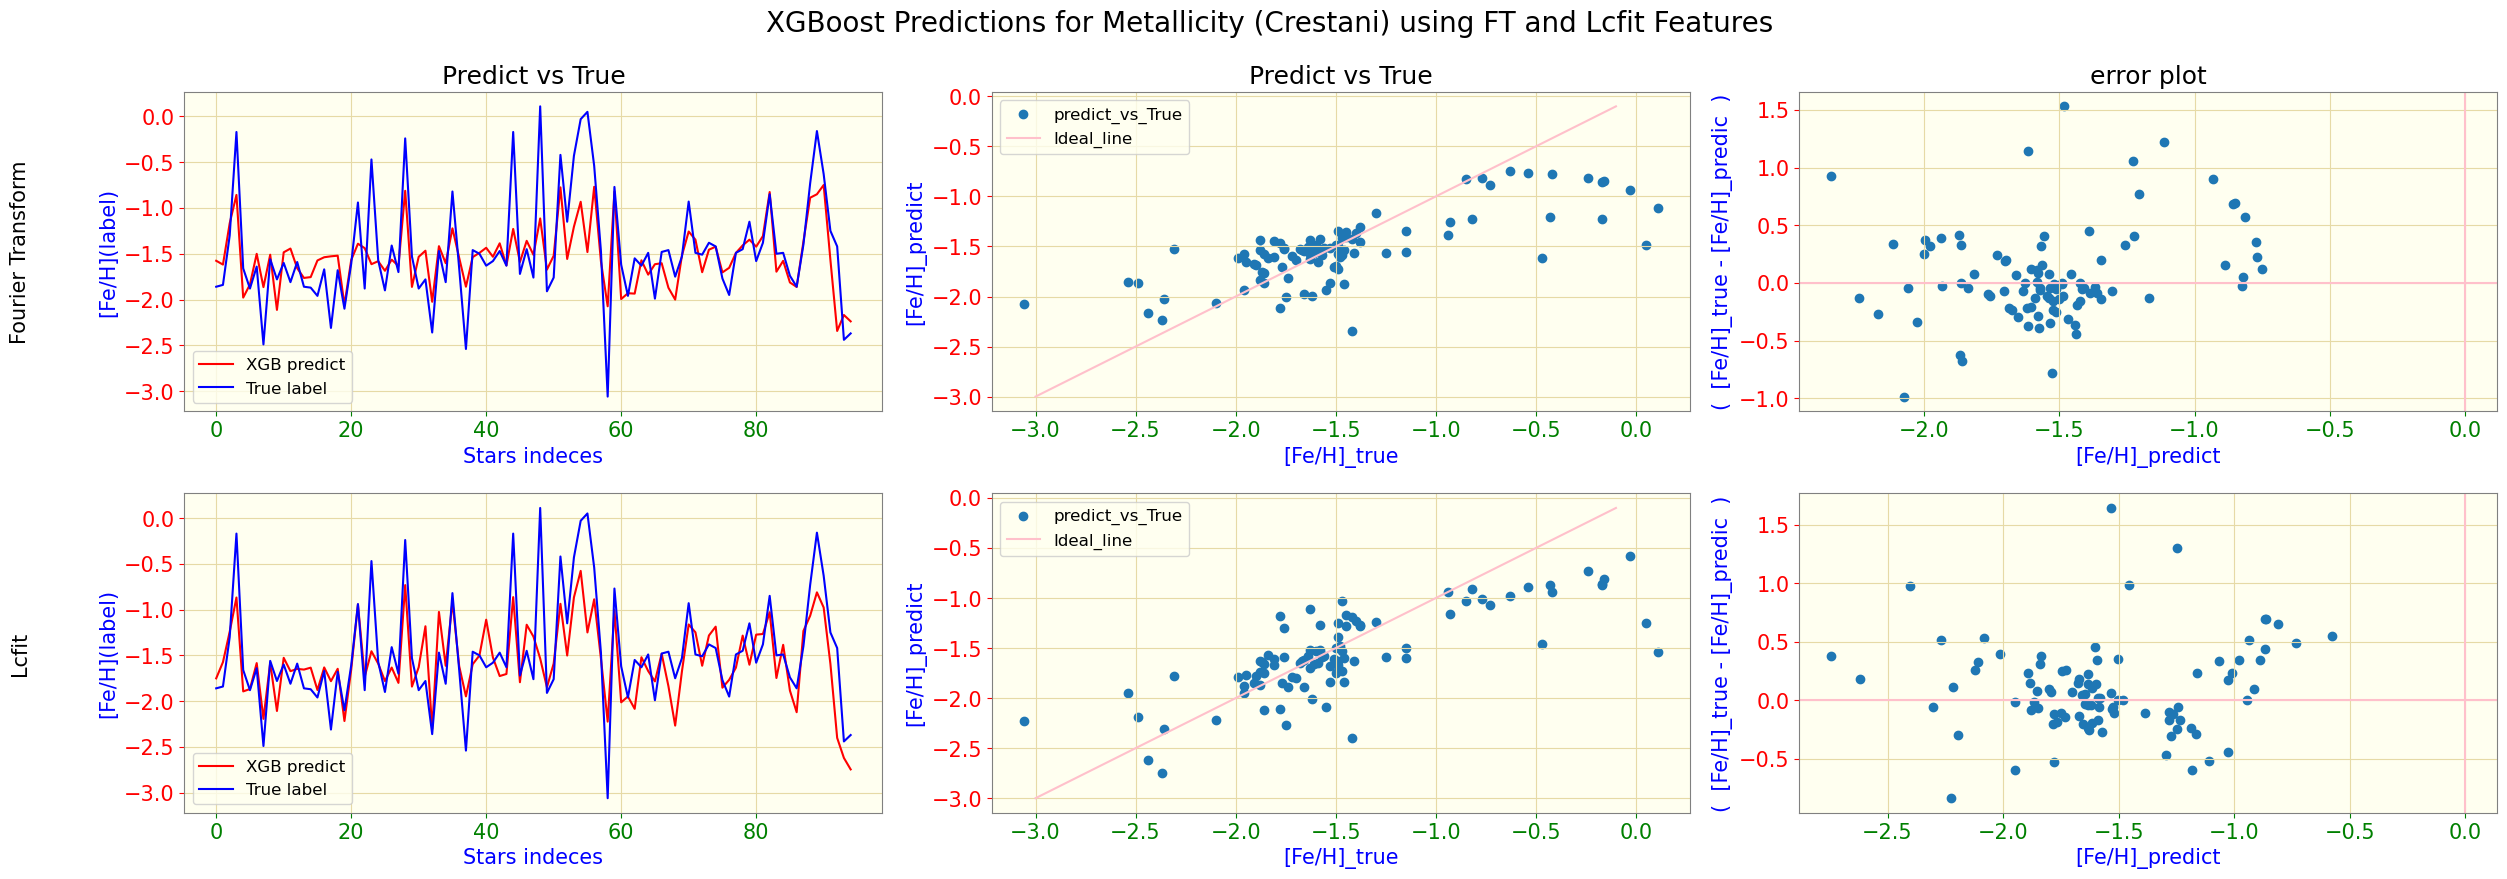

In [395]:
plt.rcParams['figure.figsize'] = [25, 9]
fig, ax = plt.subplots(2, 3)

ax[0, 0].plot(x_T_df.index, y_pred_T, color = 'red', label = 'XGB predict')
ax[0, 0].plot(x_T_df.index, y_T, color = 'blue', label= 'True label')
ax[0, 0].grid(True)
ax[0, 0].set_xlabel('Stars indeces')
ax[0, 0].set_ylabel('[Fe/H](label)')
ax[0, 0].set_title('Predict vs True')
ax[0, 0].legend()

ax[0, 1].scatter(y_T, y_pred_T, label = 'predict_vs_True')
ax[0, 1].plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'pink', label = 'Ideal_line')
ax[0, 1].set_xlabel('[Fe/H]_true')
ax[0, 1].set_ylabel('[Fe/H]_predict')
ax[0, 1].grid(True)
ax[0, 1].set_title('Predict vs True')
ax[0, 1].legend()


ax[0, 2].scatter(y_pred_T , y_T.flatten() - y_pred_T)
ax[0, 2].axhline(y = 0, color = 'pink')
ax[0, 2].axvline(x = 0, color = 'pink')
ax[0, 2].set_xlabel('[Fe/H]_predict')
ax[0, 2].set_ylabel('(  [Fe/H]_true - [Fe/H]_predic  )')
ax[0, 2].set_title('error plot')
ax[0, 2].grid(True)



ax[1, 0].plot(x_T_df.index, y_pred_L, color = 'red', label = 'XGB predict')
ax[1, 0].plot(x_T_df.index, y_L, color = 'blue', label= 'True label')
ax[1, 0].grid(True)
ax[1, 0].set_xlabel('Stars indeces')
ax[1, 0].set_ylabel('[Fe/H](label)')
ax[1, 0].legend()

ax[1, 1].scatter(y_L, y_pred_L, label = 'predict_vs_True')
ax[1, 1].plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'pink', label = 'Ideal_line')
ax[1, 1].set_xlabel('[Fe/H]_true')
ax[1, 1].set_ylabel('[Fe/H]_predict')
ax[1, 1].grid(True)
ax[1, 1].legend()


ax[1, 2].scatter(y_pred_L , y_L.flatten() - y_pred_L)
ax[1, 2].axhline(y = 0, color = 'pink')
ax[1, 2].axvline(x = 0, color = 'pink')
ax[1, 2].set_xlabel('[Fe/H]_predict')
ax[1, 2].set_ylabel('(  [Fe/H]_true - [Fe/H]_predic  )')
ax[1, 2].grid('True')



ax[0, 0].annotate('Fourier Transform', xy=(-0.25, 0.5), xycoords='axes fraction', rotation=90, va='center')
ax[1, 0].annotate('Lcfit', xy=(-0.25, 0.5), xycoords='axes fraction', rotation=90, va='center')
fig.suptitle('XGBoost Predictions for Metallicity (Crestani) using FT and Lcfit Features', fontsize=20)

plt.tight_layout()

In [253]:
log_data = pd.DataFrame(grid_search.cv_results_)
log_data.to_csv('./log_XGB.csv')
log_data.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_n_estimators', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

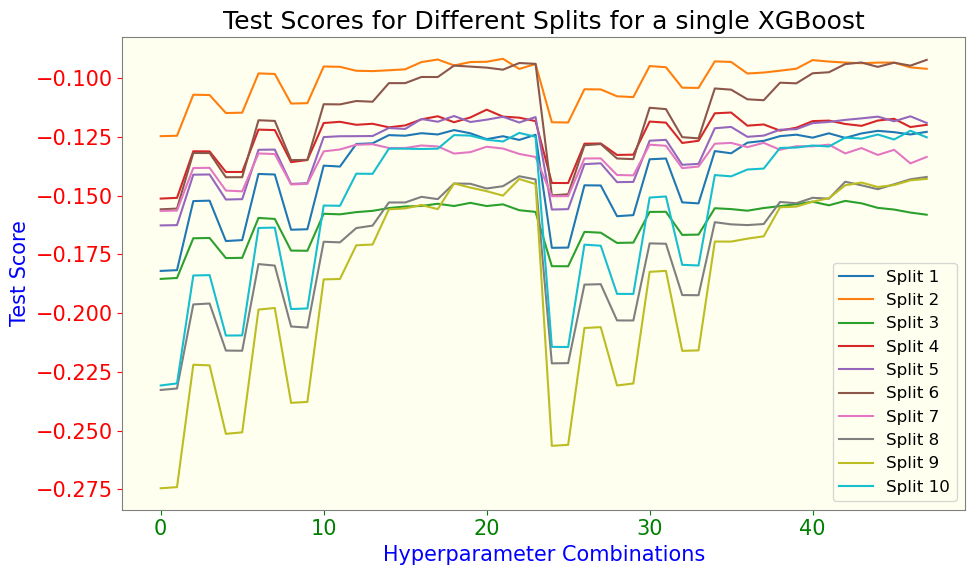

In [396]:
hyperparameters = log_data[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'param_subsample', 'param_colsample_bytree']]
test_scores = log_data[['split{}_test_score'.format(i) for i in range(10)]]


fig, ax = plt.subplots(figsize=(10, 6))


for i in range(10):
    ax.plot(hyperparameters.index, test_scores[f'split{i}_test_score'], label=f'Split {i + 1}')


ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Test Score')
ax.set_title('Test Scores for Different Splits for a single XGBoost')
ax.legend(loc='best')


plt.tight_layout()
plt.show()


In [397]:
#####result of mean squared errors:

FT_mse = mean_squared_error(y_T, y_pred_T)
L_mse = mean_squared_error(y_L, y_pred_L)

print('The mse for FT processed features XGB :', FT_mse)
print('The mse for Lcfit processed features XGB :', L_mse)




The mse for FT processed features XGB : 0.1695762246752523
The mse for Lcfit processed features XGB : 0.1546655102947378


### For Lcfit processed features we have better performance, since the trained data features were processed with lcfit 

# –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Stack Learning:

In [ ]:
{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

FeH
0      -1.7214431110944624
1       -2.886219502782918
2      -1.4348027872030018
3      -1.4255067103771193
4      -2.5989645233109053
...                    ...
13185   -1.160521539904357
13186   -2.086191061551439
13187  -0.9526182353452439
13188  -0.5588176354901435
13189  -1.1511256374029166

[13190 rows x 1 columns]

In [357]:
# train on 76 data points for each base estimator

x_r_train, x_r_predict, y_r_train, y_r_predict =  train_test_split(x, y , test_size=0.2, random_state=42)
x_r_train_L, x_r_predict_L, y_r_train_L, y_r_predict_L =  train_test_split(X_L_df, y_L_df, test_size=0.2, random_state=42)


In [358]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error


#---- an XGBoost on DR2-----


X_train, X_holdout, y_train, y_holdout = train_test_split(np.array(x_r_train, dtype = float),
                                                          np.array(y_r_train, dtype = float), test_size=0.2, random_state=42)
xgb_param_grid = {'colsample_bytree': [0.8, 0.9],'learning_rate': [0.05, 0.001],
                  'max_depth': [4, 5],'n_estimators': [ 200],'subsample': [0.8, 0.9]}
xgb_model_1 = xgb.XGBRegressor(objective='reg:squarederror')

grid_search_xgb_1 = GridSearchCV(estimator=xgb_model_1, param_grid=xgb_param_grid, cv=7, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_xgb_1.fit(X_train, y_train, eval_set=[(X_holdout, y_holdout)], verbose=False)

best_params_xgb = grid_search_xgb_1.best_params_

print("Best Hyperparameters for XGBoost Regression Model:", best_params_xgb)

xgb_model_1 = xgb.XGBRegressor(**best_params_xgb)

xgb_model_1.fit(X_train, y_train)





#----XGboost on DR2------


X_train_L, X_holdout_L, y_train_L, y_holdout_L = train_test_split(np.array(x_r_train_L),
                                                                  np.array(y_r_train_L), test_size=0.2, random_state=42)



xgb_param_grid = {'colsample_bytree': [0.8, 0.9],'learning_rate': [0.1,0.05, 0.001],
                  'max_depth': [4, 5],'n_estimators': [100, 200],'subsample': [0.8, 0.9]}
xgb_model_2 = xgb.XGBRegressor(objective='reg:squarederror')

grid_search_xgb_2 = GridSearchCV(estimator=xgb_model_2, param_grid=xgb_param_grid, cv=7, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_xgb_2.fit(X_train_L, y_train_L, eval_set=[(X_holdout_L, y_holdout_L)], verbose=False)

best_params_xgb = grid_search_xgb_2.best_params_

print("Best Hyperparameters for XGBoost Regression Model:", best_params_xgb)

xgb_model_2 = xgb.XGBRegressor(**best_params_xgb)

xgb_model_2.fit(X_train_L, y_train_L)



#---create a meta data-------


xgb_preds = xgb_model_1.predict(X_train_L)
rf_preds = xgb_model_2.predict(X_train_L)



#----regression on DR3------
meta_X = pd.DataFrame({'XGB': xgb_preds, 'XGB2': rf_preds})

meta_x = np.average([xgb_preds, rf_preds], axis=0)




# prediction : first happens with the base estimators, second with the regression.
#xgb_preds_new = xgb_model.predict(x_pre)
#rf_preds_new = rf_model.predict(x_pre)

#meta_X_new = pd.DataFrame({'XGB': xgb_preds_new, 'RF': rf_preds_new})
#stacking_preds_new = meta_model.predict(meta_X_new)


#stacking_mse_new = mean_squared_error(y_true, stacking_preds_new)
#print("Stacking Model Mean Squared Error (MSE) on New Data:", stacking_mse_new)


Best Hyperparameters for XGBoost Regression Model: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Hyperparameters for XGBoost Regression Model: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}


In [313]:
X_holdout_L

array([[0.525768, 0.361   , 0.163   , 0.133   , 4.71    , 8.524   ],
       [0.674572, 0.29    , 0.15    , 0.099   , 5.621   , 9.0159  ],
       [0.609042, 0.297   , 0.144   , 0.106   , 5.189   , 8.715   ],
       [0.630215, 0.168   , 0.072   , 0.039   , 5.824   , 9.0701  ],
       [0.570053, 0.29    , 0.129   , 0.109   , 5.121   , 8.7136  ],
       [0.800075, 0.2     , 0.092   , 0.054   , 5.909   , 9.1383  ],
       [0.552465, 0.244   , 0.121   , 0.069   , 5.854   , 9.0938  ],
       [0.567982, 0.289   , 0.155   , 0.101   , 5.366   , 8.8112  ],
       [0.713338, 0.239   , 0.1     , 0.066   , 5.19    , 8.792   ],
       [0.596399, 0.22    , 0.103   , 0.068   , 5.457   , 8.8269  ],
       [0.496451, 0.4     , 0.192   , 0.139   , 4.863   , 8.6045  ],
       [0.546734, 0.382   , 0.189   , 0.113   , 5.26    , 8.7167  ],
       [0.574343, 0.276   , 0.128   , 0.1     , 5.014   , 8.6162  ],
       [0.547791, 0.31    , 0.158   , 0.107   , 5.121   , 8.6789  ],
       [0.452408, 0.407   , 0.19  

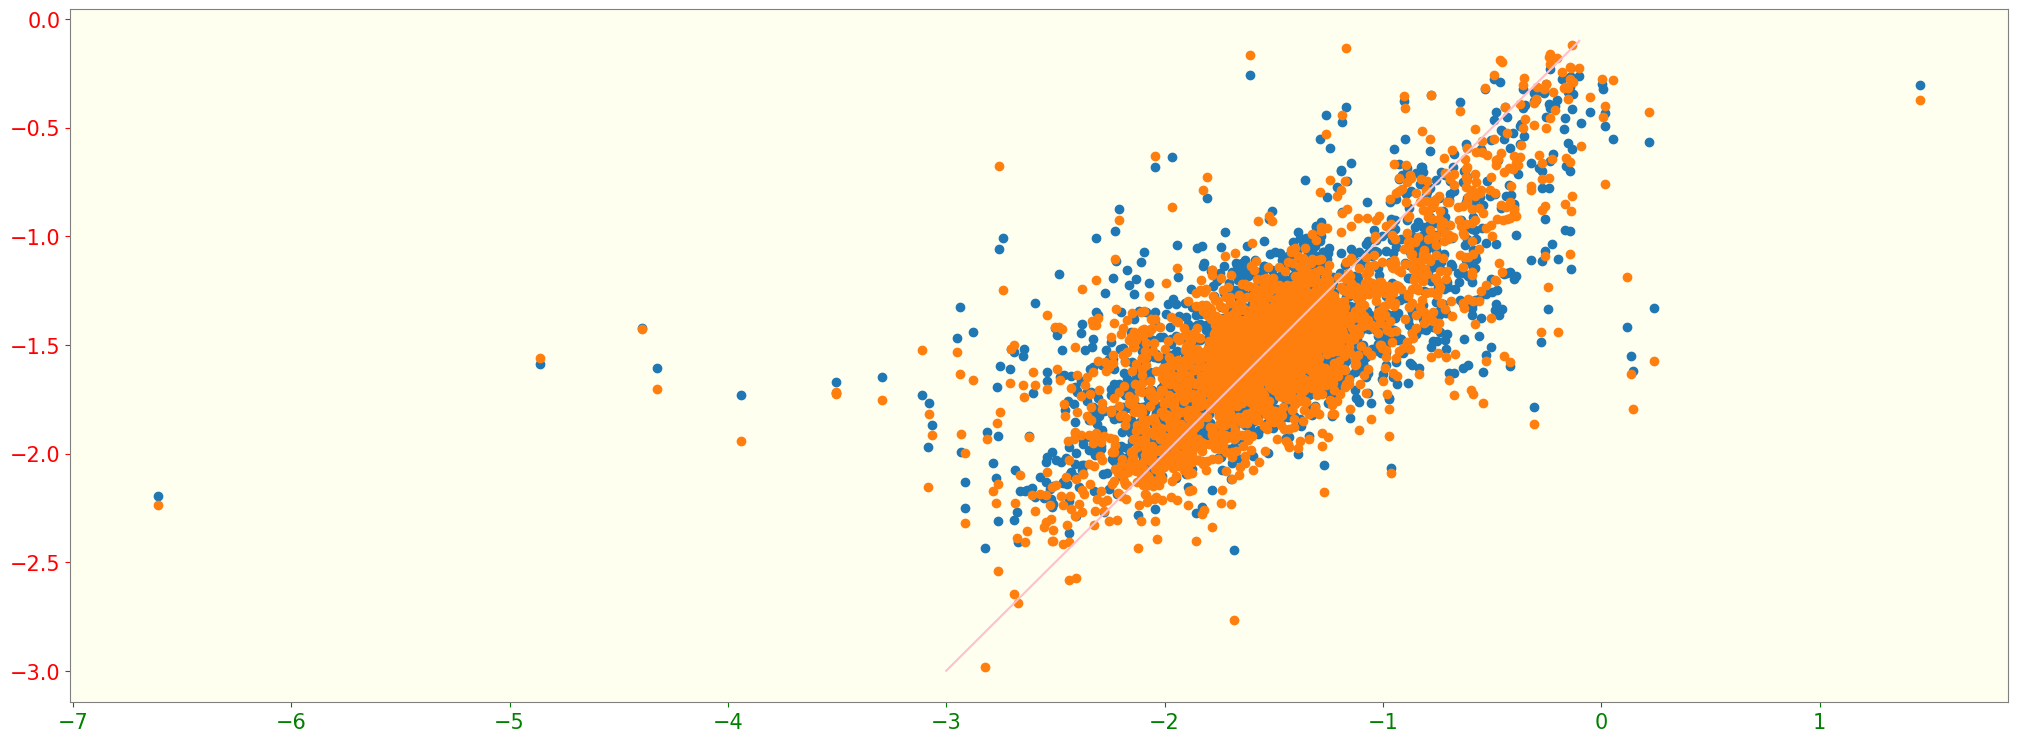

In [359]:
xgb_preds_new = xgb_model_1.predict(np.array(x_r_predict, dtype = float))
rf_preds_new = xgb_model_2.predict(np.array(x_r_predict, dtype = float))
meta_y_new = pd.DataFrame({'XGB': xgb_preds_new, 'XGB2': rf_preds_new})
meta_x = np.average([xgb_preds_new, rf_preds_new], axis=0)
#stacking_preds_new = meta_model.predict(np.array(meta_y_new))



plt.scatter(np.array(y_r_predict, dtype = float), meta_x)
plt.scatter(np.array(y_r_predict, dtype = float), xgb_preds_new)
plt.plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'pink', label = 'Ideal_line')



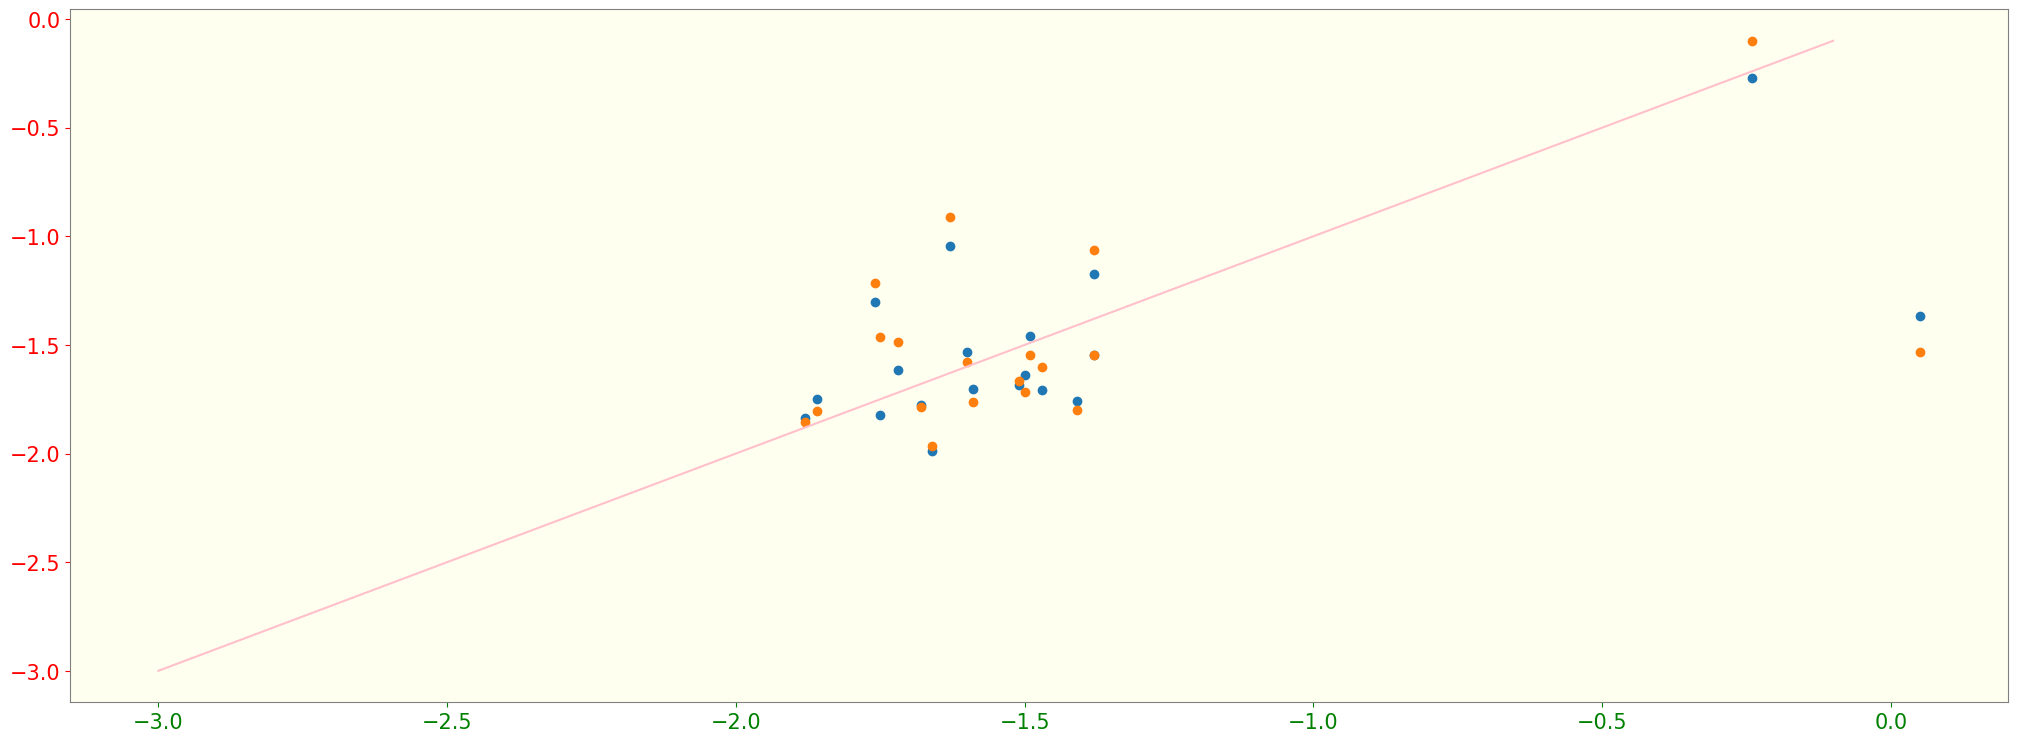

In [360]:
xgb_preds_new_L = xgb_model_1.predict(np.array(x_r_predict_L, dtype = float))
rf_preds_new_L = xgb_model_2.predict(np.array(x_r_predict_L, dtype = float))
meta_y_new_L = pd.DataFrame({'XGB': xgb_preds_new_L, 'XGB2': rf_preds_new_L})
meta_x_L = np.average([xgb_preds_new_L, rf_preds_new_L], axis=0)
#stacking_preds_new_L = meta_model.predict(meta_y_new_L)



plt.scatter(np.array(y_r_predict_L), meta_x_L)
plt.scatter(np.array(y_r_predict_L), rf_preds_new_L)
plt.plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'pink', label = 'Ideal_line')

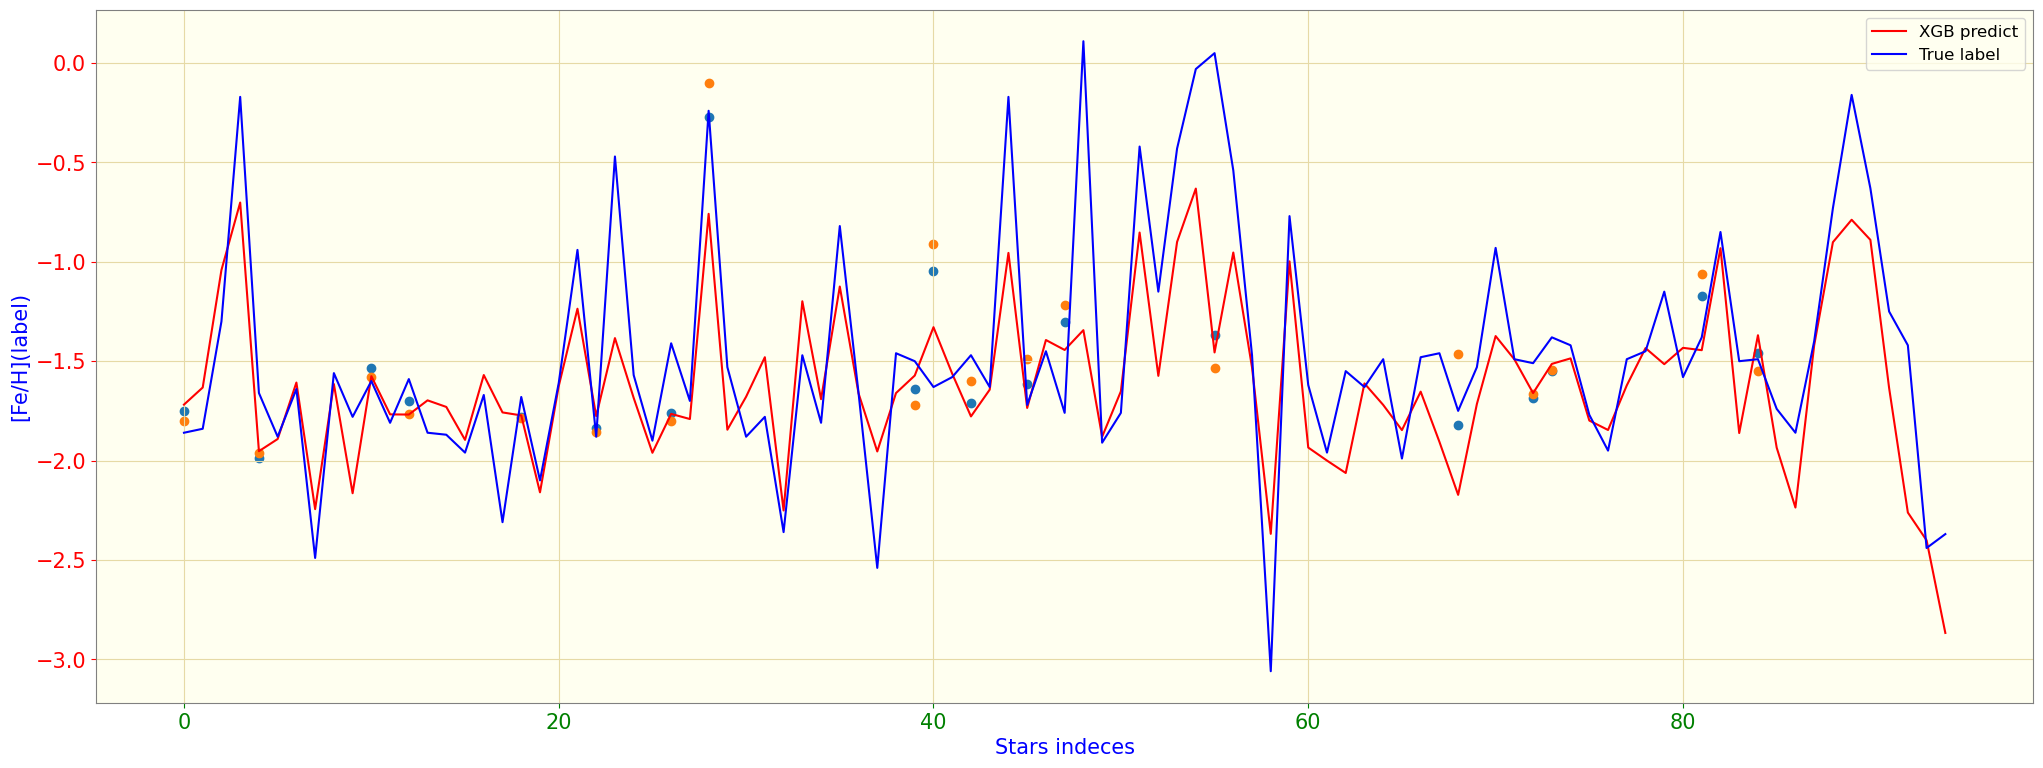

In [361]:
plt.rcParams['figure.figsize'] = [25, 9]
fig, ax = plt.subplots()


ax.plot(x_T_df.index, y_pred_L, color = 'red', label = 'XGB predict')
ax.plot(x_T_df.index, y_L, color = 'blue', label= 'True label')
ax.scatter(x_r_predict_L.index, meta_x_L)
ax.scatter(x_r_predict_L.index, rf_preds_new_L)
ax.grid(True)
ax.set_xlabel('Stars indeces')
ax.set_ylabel('[Fe/H](label)')
ax.legend()

